In [14]:
from google.colab import files
files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n44,Female,31,

In [15]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

# steps
1. Take mean value
2. Find nearest number from mean value
3. Assign value in the cluster where it is the closest to
4. Repeate the process unit we get same value in all the clusters

In [16]:
df = pd.read_csv("Mall_Customers.csv")

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [17]:
# rename the columns
df.rename(columns={'CustomerID':'Id','Gender':'gender' , 'Age' :'age' , 'Annual Income (k$)' : 'income' , 'Spending Score (1-100)' : 'spending'},inplace=True)

In [18]:
df

,Id,gender,age,income,spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [19]:
df.isnull().sum()

Id          0
gender      0
age         0
income      0
spending    0
dtype: int64

In [20]:
df.describe()

,Id,age,income,spending
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


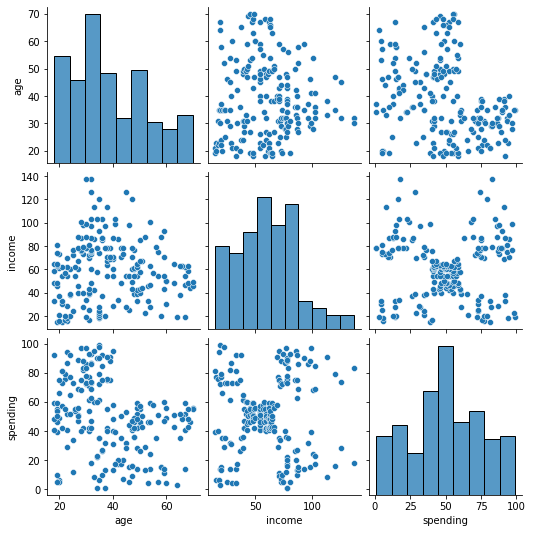

In [21]:
seaborn.pairplot(df[['age','income','spending']])

In [22]:
import sklearn.cluster as cluster

In [23]:
kmeans = cluster.KMeans(n_clusters=5)

In [24]:
kmeans = kmeans.fit(df[['spending','income']])

In [25]:
kmeans.cluster_centers_
# shows the all five spending and income cluster centers

array([[17.11428571, 88.2       ],
       [49.51851852, 55.2962963 ],
       [79.36363636, 25.72727273],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783]])

In [26]:
# showing the cluser number of each income row
df['income_clusters'] = kmeans.labels_

In [27]:
df

,Id,gender,age,income,spending,income_clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,0
197,198,Male,32,126,74,3
198,199,Male,32,137,18,0


In [28]:
df['income_clusters'].value_counts()

1    81
3    39
0    35
4    23
2    22
Name: income_clusters, dtype: int64

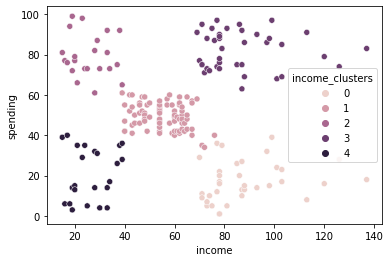

In [29]:
seaborn.scatterplot(x = 'income', y = 'spending',hue = 'income_clusters',data =df)

In [30]:
kmeans = cluster.KMeans(n_clusters=2)

In [31]:
kmeans = kmeans.fit(df[['age','income']])

In [32]:
kmeans.cluster_centers_

array([[42.21904762, 40.78095238],
       [35.12631579, 82.42105263]])

In [33]:
# showing the cluser number of each income row
df['age_clusters'] = kmeans.labels_

In [34]:
df

,Id,gender,age,income,spending,income_clusters,age_clusters
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,4,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,1
196,197,Female,45,126,28,0,1
197,198,Male,32,126,74,3,1
198,199,Male,32,137,18,0,1


In [35]:
df['age_clusters'].value_counts()

0    105
1     95
Name: age_clusters, dtype: int64

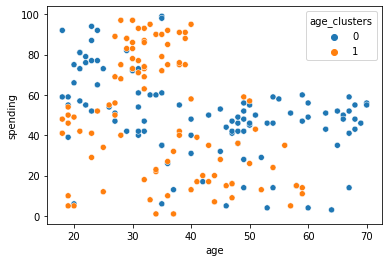

In [36]:
seaborn.scatterplot(x = 'age', y = 'spending',hue = 'age_clusters',data =df)

The scatter plot shows that the person who's age are between 20 to 40 their possibility of spening is very high . Where as the people who's age is 60 their buying is very very low

In [37]:
# Elbow method
from sklearn.cluster import KMeans

In [38]:
K_range = range(1,12)
wcss = []

In [39]:
for k in K_range:
  km = KMeans(n_clusters=k)
  km.fit(df[['age','income']])
  wcss.append(km.inertia_)

In [40]:
wcss

[176108.77999999997,
 87121.56591478697,
 59486.96143928035,
 39529.88796736351,
 31662.41214275872,
 25399.022004416984,
 21784.366011007998,
 18809.5703586406,
 16069.114302348427,
 13780.417928991299,
 12218.313798082163]

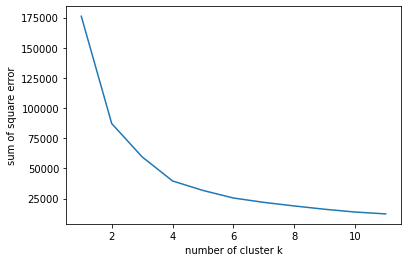

In [41]:
plt.xlabel("number of cluster k")
plt.ylabel("sum of square error")
plt.plot(K_range, wcss)

The number of cluster should be 5 beacuse there is a very low inclind from 4  that becomes steady in 6